# Chapter 1: Introduction to probabilty

In [282]:
# utils.py

#matplot
import matplotlib.pyplot as plt

#helpers
from functools import partial
from itertools import accumulate, product
from fractions import Fraction

#sympy
from sympy import Symbol, Eq
from sympy.stats import Die, Coin, density, given, FiniteRV, P

In [283]:
# Fraction is a class that respresents rational numbers
Fracstr = lambda p,q : str(Fraction(p,q))

In [284]:
# To format the dictionary values to 2 decimal floats
get_round_dic = lambda dic:{k:round(float(v),2) for k,v in dic.items()} 

In [285]:
# Returns the sample space (SS) of the random experiment (RE)
get_Omega = lambda re: set(density(re).dict.keys()) 

In [286]:
# power: returns cartesian product of a set with itself n times
set_Power = lambda omega,n: set(product(omega,repeat=n))

In [287]:
# product: returns the cartesian product of the given sets
set_Product = lambda omegas: set(product(*omegas))

In [288]:
# filter: selects elements from a set based on some criterion
set_Filter = lambda predicate,collection:set(filter(predicate,collection))

In [289]:
# Pe: returns the probabbility of an event from equally likely SS
Pe  = lambda Omega, Event : Fraction(len(Event), len(Omega))

In [290]:
# Pde: returns the probabbility of an elementary event from equally likely SS
Pde = lambda Omega : { omega : Fracstr(1,len(Omega)) for omega in Omega}

In [291]:
# Pgiven: returns conditional probability of A given B
Pgiven = lambda EventB,EventA :\
    Fraction(len(set(EventA) & set(EventB)), len(EventA))

In [292]:
# Code101.py

"""
In this section package sympy.stats is used
class Coin models the coin tossing experiment
class Die models the die rolling experiment
"""

Omega1 = {'P','F'}                        ;print("Omega 1 = ",Omega1)
Omega3 = set(range(1,7))                  ;print("Omega 3 = ",Omega3)
Omega5 = set_Product([Omega1,Omega3])     ;print("Omega 5 = ",Omega5)
Omega6 = set_Power(Omega1,3)              ;print("Omega 6 = ",Omega6)

print("\n Using sympy.....................................\n")
#R1
coin = Coin('Coin')
coin_omega=get_Omega(coin)
print("- R1 Toss a coin omega : ",coin_omega)

#R3
die = Die('Die')
die_omega=get_Omega(die)
print("- R3 Roll die omega : ",die_omega)

#R6
threeCoins_omega=set_Power(coin_omega,3)
print("- R6 Toss coins omega : ", threeCoins_omega)

Omega 1 =  {'P', 'F'}
Omega 3 =  {1, 2, 3, 4, 5, 6}
Omega 5 =  {('F', 3), ('P', 3), ('F', 6), ('F', 2), ('P', 6), ('P', 2), ('F', 5), ('P', 5), ('F', 4), ('F', 1), ('P', 4), ('P', 1)}
Omega 6 =  {('F', 'P', 'P'), ('F', 'P', 'F'), ('F', 'F', 'F'), ('P', 'F', 'P'), ('P', 'F', 'F'), ('P', 'P', 'P'), ('P', 'P', 'F'), ('F', 'F', 'P')}

 Using sympy.....................................

- R1 Toss a coin omega :  {T, H}
- R3 Roll die omega :  {1, 2, 3, 4, 5, 6}
- R6 Toss coins omega :  {(H, H, T), (T, T, T), (T, H, H), (H, T, H), (H, H, H), (T, H, T), (T, T, H), (H, T, T)}


In [293]:
#Code102.py

print("Events manipulation (operations)")

abc_Omega = {1,2,3,4,5,6}    ;print("Sample space Omega      : ",abc_Omega)
A = {2,5}                    ;print("Event A                 : ", A)
B = {3,4,5}                  ;print("Event B                 : ",B)
isEvent = A < abc_Omega      ;print("is A event of Omega     : ", isEvent)
a_bar = abc_Omega - A        ;print("Complement of A         : ", a_bar)
C = A | B                    ;print("Union of A and B        : ", C)
D = A & B                    ;print("Intersection of A and B : ", D)
E = A - B                    ;print("Difference of A and B   : ", E)
F = A ^ B                    ;print("Symetric Diff A and B   : ", F)

# isEvenNumber: predicate to check if a number is even
isEvenNumber = lambda nb : nb % 2 == 0

die_omega=get_Omega(Die('Die'))
evenNb =set_Filter(isEvenNumber,die_omega)
print("Event A even numbers  : ", evenNb)

evenNbComplement = set(die_omega) - set(evenNb)
print("Event Complement of A : ", evenNbComplement)

Events manipulation (operations)
Sample space Omega      :  {1, 2, 3, 4, 5, 6}
Event A                 :  {2, 5}
Event B                 :  {3, 4, 5}
is A event of Omega     :  True
Complement of A         :  {1, 3, 4, 6}
Union of A and B        :  {2, 3, 4, 5}
Intersection of A and B :  {5}
Difference of A and B   :  {2}
Symetric Diff A and B   :  {2, 3, 4}
Event A even numbers  :  {2, 4, 6}
Event Complement of A :  {1, 3, 5}


In [294]:
#Code103.py

# class Symbol sets symbols for algebric expressions. "T" for coin tail
# twoTails: checks if the outcome has two tails
twoTails = lambda triple : triple.count(Symbol("T") )==2

coin_omega=get_Omega(Coin('Coin'))
threeCoins_omega = set_Power(coin_omega,3)
has2Tails = set_Filter(twoTails,threeCoins_omega)
print("Event with two tails only : ", has2Tails)

Event with two tails only :  {(T, T, H), (T, H, T), (H, T, T)}


In [295]:
#Code104.py

# partial: returns a new function from the given one by setting the specified parameters
Omega = {1,2,3,4,5,6}          ;print("Omega               : ", Omega)
A     = {2,5}                  ;print("Event A             : ", A)
pe    = partial(Pe,Omega)
pe_A  = pe(A)                  ;print("Probability of A    : ", pe_A)
pde   = Pde(Omega)             ;print("Probability App     : ", pde)

Omega               :  {1, 2, 3, 4, 5, 6}
Event A             :  {2, 5}
Probability of A    :  1/3
Probability App     :  {1: '1/6', 2: '1/6', 3: '1/6', 4: '1/6', 5: '1/6', 6: '1/6'}


In [296]:
#Code105.py

die_Omega=get_Omega(Die('Die'))
threeDices_Omega = set_Power(die_Omega , 3)

print("- Drop 3 Dices Omega : ", list(threeDices_Omega)[:4])
print("- Omega length : "      , len(threeDices_Omega))

print("- Drop 3 Dices Omega : ", threeDices_Omega)

P_3Dices_Omega = Pde(threeDices_Omega)
print("- Proba mapping : "     , list(P_3Dices_Omega.items())[:4])

# ev_Property: checks if the sum of the two first elements equals the 3rd one 
ev_Property = lambda omega : omega[0] + omega[1] == omega[2]
E   = set_Filter(ev_Property, threeDices_Omega) ; print("- E Length: ",len(E))
p_E = Pe(threeDices_Omega, E)                   ; print("- Probability of E : ",p_E)

- Drop 3 Dices Omega :  [(5, 1, 6), (5, 3, 3), (5, 4, 2), (2, 1, 6)]
- Omega length :  216
- Drop 3 Dices Omega :  {(5, 1, 6), (5, 3, 3), (5, 4, 2), (2, 1, 6), (1, 6, 6), (2, 2, 5), (6, 6, 4), (3, 2, 1), (2, 6, 5), (5, 2, 4), (5, 5, 3), (3, 1, 5), (3, 3, 2), (3, 6, 1), (4, 1, 2), (2, 4, 5), (6, 4, 6), (5, 3, 5), (5, 4, 4), (5, 6, 1), (3, 5, 2), (6, 1, 1), (4, 4, 3), (5, 2, 6), (1, 3, 2), (5, 5, 5), (3, 3, 4), (3, 6, 3), (4, 1, 4), (4, 3, 1), (6, 2, 2), (1, 1, 2), (5, 1, 1), (5, 4, 6), (1, 5, 2), (5, 6, 3), (1, 6, 1), (3, 5, 4), (6, 1, 3), (4, 2, 2), (4, 4, 5), (4, 6, 2), (6, 5, 3), (1, 3, 4), (1, 4, 3), (3, 3, 6), (3, 4, 5), (4, 1, 6), (6, 2, 4), (6, 4, 4), (1, 1, 4), (5, 1, 3), (1, 5, 4), (5, 6, 5), (1, 6, 3), (2, 2, 2), (3, 5, 6), (4, 2, 4), (6, 1, 5), (2, 6, 2), (2, 5, 4), (5, 2, 1), (4, 6, 4), (3, 1, 2), (4, 5, 6), (6, 5, 5), (1, 3, 6), (1, 4, 5), (2, 4, 2), (6, 2, 6), (2, 3, 6), (5, 1, 5), (5, 3, 2), (5, 4, 1), (1, 5, 6), (1, 6, 5), (2, 2, 4), (4, 2, 6), (6, 3, 1), (2, 6, 4), (2, 

In [297]:
#Code106.py

coin_Omega=get_Omega(Coin('Coin'))
twoCoins_Omega = set_Power(coin_Omega, 2)
print("- Toss 2 Coins Omega : ",twoCoins_Omega)

p_2Coins_Omega = Pde(twoCoins_Omega)
print("- Proba map : ",p_2Coins_Omega)

# ev_Property: checks if the ith element of the outcome equals val
ev_Property = lambda i, val, omega : omega[i] == val

# set_Filter: filters the given SS using ev_Property with the specified parameters
E   = set_Filter(partial(ev_Property,0, Symbol("T")) , twoCoins_Omega)
p_E = Pe(twoCoins_Omega, E)
print("- Event E : ",E, " Probability : ",p_E)

F   = set_Filter(partial(ev_Property,1, Symbol("T")) , twoCoins_Omega)
p_F = Pe(twoCoins_Omega, F)
print("- Event F : ",F, " Probabulity : ",p_F)

EF   = E & F
p_EF = Pe(twoCoins_Omega, EF)
print("- Event E et F : ",EF, " Probability : ", p_EF)

K   = E | F
p_K = p_E + p_F - p_EF
print("- Event K (E or F) : ", K, " Probability : ", p_K)

- Toss 2 Coins Omega :  {(T, T), (T, H), (H, T), (H, H)}
- Proba map :  {(T, T): '1/4', (T, H): '1/4', (H, T): '1/4', (H, H): '1/4'}
- Event E :  {(T, T), (T, H)}  Probability :  1/2
- Event F :  {(T, T), (H, T)}  Probabulity :  1/2
- Event E et F :  {(T, T)}  Probability :  1/4
- Event K (E or F) :  {(T, T), (T, H), (H, T)}  Probability :  3/4


F( 23 ): 0.5072972343239857
F( 30 ): 0.7063162427192688
F( 41 ): 0.9031516114817354
F( 57 ): 0.9901224593411699


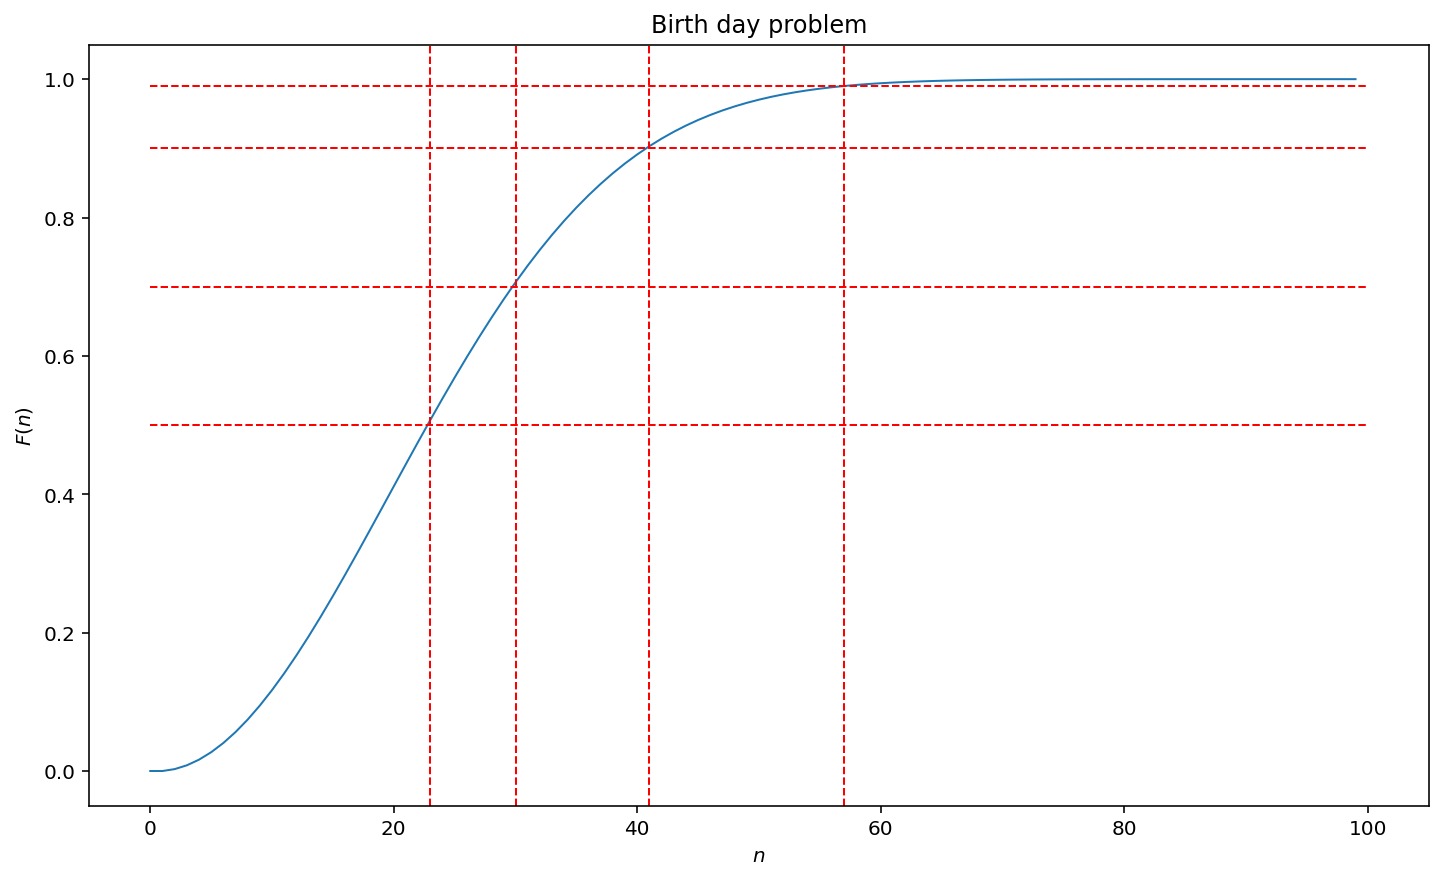

In [298]:
#Code107.py

# function prod of numpy is used to compute the product of the vector's elements
def get_birth(n, L):
    import numpy as np

    F = lambda n : 1 - np.prod([(365-i)/365 for i in range(n)])
    E = [F(i) for i in range(n)]
    for i in L :print("F(",i,"):",F(i))
    return E

# plotter: plots the function associated with the birthday probability example
def plotter(n,E):
    import matplotlib.pyplot as plt

    plt.plot(range(n), E, linewidth=1)
    xpos = [23, 30, 41, 57]
    for xc in xpos: plt.axvline(x=xc, color='r', linewidth=1, linestyle='--')

    ypos = [0.5, 0.7, 0.9, 0.99]
    for yc in ypos: plt.hlines(y=yc, xmin=0, xmax=100, linewidth=1, color='r',
                               linestyle='--')

    plt.xlabel('$n$'); 	plt.ylabel(r'$F(n)$'); plt.title('Birth day problem')
    plt.show()

n = 100
L = [23,30,41,57]
plotter(n,get_birth(n,L))

In [299]:
#Code108.py

Omega = set_Power(range(1,7), 2)

# set_Filter: filters the outcomes having the first element equals 4.
F= set_Filter(lambda a: a[0] == 4,Omega)
print("F given Event : ", F, ", P(F)=", Pe(Omega,F))

# set_Filter: filters the outcomes having the sum of the 1st and the 2nd elements equals 6.
E= set_Filter(lambda a : a[0] + a[1] == 6,Omega)
print("E event : ",E, ", P(E)=", Pe(Omega,E))

EF = E & F
print("E and F event : ",EF, ", P(E & F)=", Pe(Omega,EF))

p_given_F = Pgiven(E,F)
print("Probability of E given F : ", p_given_F)

F given Event :  {(4, 4), (4, 3), (4, 6), (4, 2), (4, 5), (4, 1)} , P(F)= 1/6
E event :  {(2, 4), (1, 5), (5, 1), (4, 2), (3, 3)} , P(E)= 5/36
E and F event :  {(4, 2)} , P(E & F)= 1/36
Probability of E given F :  1/6


In [300]:
#Code109.py

# get_diff_pairs: returns cartesian product of U discarding the diagonal elements
def get_diff_pairs(U):
    return [(i,j) for i in U for j in U if i!=j]

R = { 'r1' , 'r2', 'r3',  'r4' }
B = { 'b1', 'b2', 'b3', 'b4', 'b5', 'b6' }

Omega = get_diff_pairs(R | B)
Pr = partial(Pe,Omega)

# selects the outcomes having the 1st element starting with 'r'
A = set_Filter(lambda X:X[0][0] == 'r',Omega)
print("Probability of A:",Pr(A))

B = set_Filter(lambda X:X[1][0] == 'r',Omega)
print("Probability of B:",Pr(B))

AB = set_Filter(lambda X:X[0][0] == 'r' and X[1][0] == 'r',Omega)
print("Probability of AB:",Pr(AB))

print("Probability of B given A:",Pgiven(B,A))

Probability of A: 2/5
Probability of B: 2/5
Probability of AB: 2/15
Probability of B given A: 1/3


In [301]:
#Code110.py

N, p = 4, 0.4

# omega's outcomes are represented as tuples (X,i,j) s.t :
# X is Y if the student knows the answer and N otherwise
# i is the correct answer and j is the given answer 
E = set(product({'N'},set(range(1,N+1)),set(range(1,N+1))))
F = set([('Y',i,i) for i in range(1,N+1)])
Omega = F.union(E)

Dist =  { o : (1-p)/(N*N) if o[0]=='N' else p/N  for o in Omega }
print(Dist)

PF = 0; PEF=0
for i in Omega:
    if i[1] == i[2]: PF  += Dist[i]
    if i[0] == 'Y' : PEF += Dist[i]

print("P(E|F) = %0.5f" % (PEF/PF))
print("Bayes rule: ",N*p/(1+(N-1)* p))

{('N', 1, 2): 0.0375, ('N', 2, 2): 0.0375, ('N', 3, 2): 0.0375, ('Y', 1, 1): 0.1, ('N', 4, 2): 0.0375, ('Y', 3, 3): 0.1, ('Y', 4, 4): 0.1, ('N', 2, 3): 0.0375, ('N', 3, 3): 0.0375, ('N', 1, 3): 0.0375, ('N', 4, 3): 0.0375, ('Y', 2, 2): 0.1, ('N', 1, 1): 0.0375, ('N', 2, 1): 0.0375, ('N', 1, 4): 0.0375, ('N', 3, 1): 0.0375, ('N', 2, 4): 0.0375, ('N', 4, 1): 0.0375, ('N', 3, 4): 0.0375, ('N', 4, 4): 0.0375}
P(E|F) = 0.72727
Bayes rule:  0.7272727272727273


In [302]:
#Code111.py

#pmf_i: returns the probability of getting tail in the ith toss of coin omega[0]
pmf_i = (lambda omega, i :
    (density(cf).dict[omega[i]] if omega[0]==1 else density(cu).dict[omega[i]]))

# The outcome is encoded as follows (H=1, T=2):
# chosen coin * 100 + 1st toss * 10 + 2nd toss
encode_omega = (lambda o:
                o[0]*100+(1 if o[1]==H else 2)*10+(1 if o[2] == H else 2))
get_proba = lambda o : PC[o[0]] * pmf_i(o, 1) * pmf_i(o, 2)

H = Symbol('H')

# PC: chosen coin, cu: unfair coin, cf: fair coin
PC, cu, cf  = { 1:1/2, 2:1/2}, Coin('CU', 1)  , Coin('CF')
omegaPC , omegaC = PC.keys(), get_Omega(cf)

# generates the SS of the experiment (X,Y,Z):
# X is the chosen coin, Y, Z is the outcome of resp, the 1st and 2nd  toss
Omega = set_Product([omegaPC, omegaC, omegaC])
dist = { o: PC[o[0]]* pmf_i(o, 1) * pmf_i(o, 2)  for o in Omega }
print("Distribution : ", dist)

# Encodes the distribution's outcomes as numbers to make it easy for events handling
dist_encoded = { encode_omega(o) : get_proba(o) for o in Omega }
print("Encoded distribution : ",dist_encoded)

X    = FiniteRV('X', dist_encoded)
A    = X % 100 < 20   ; print("Probability of getting T in the first toss: %0.2f" % P(A))
B    = X % 10 < 2     ; print("Probability of getting T in the second toss: %0.2f" % P(B))
C    = X < 200        ; print("Probability of choosing the first coin: %0.2f" % P(C))
AB   = Eq(X % 100,11) ; print("Probability of A and B: %0.2f" % P(AB))

AGC  = given(A,C)     ; print("Probability of A|C: %0.2f" % P(AGC))
BGC  = given(B,C)     ; print("Probability of B|C: %0.2f" % P(BGC))
ABGC = given(AB,C)    ; print("Probability of A and B | C: %0.2f" % P(ABGC))

Distribution :  {(2, H, T): 0, (2, T, H): 0, (1, T, T): 0.125000000000000, (1, H, H): 0.125000000000000, (2, H, H): 0.500000000000000, (2, T, T): 0, (1, T, H): 0.125000000000000, (1, H, T): 0.125000000000000}
Encoded distribution :  {212: 0, 221: 0, 122: 0.125000000000000, 111: 0.125000000000000, 211: 0.500000000000000, 222: 0, 121: 0.125000000000000, 112: 0.125000000000000}
Probability of getting T in the first toss: 0.75
Probability of getting T in the second toss: 0.75


Probability of choosing the first coin: 0.50
Probability of A and B: 0.62
Probability of A|C: 0.50
Probability of B|C: 0.50
Probability of A and B | C: 0.25
